In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
model.layers[1].name

'dense'

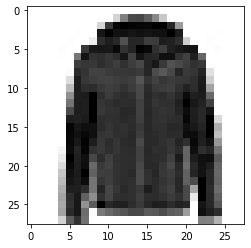

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")

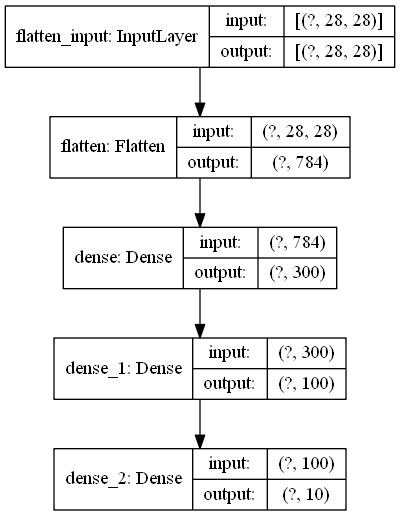

In [14]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer(hidden1.name) is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.01489723,  0.05713665, -0.06241727, ...,  0.04280181,
         0.05940275,  0.00324005],
       [-0.04998018,  0.00575029,  0.07262087, ...,  0.06211147,
        -0.07284057,  0.05868451],
       [-0.01858931,  0.00816392,  0.06638253, ...,  0.07110822,
        -0.0121695 ,  0.03039211],
       ...,
       [-0.05342897,  0.00121483,  0.0640604 , ...,  0.02985682,
        -0.02591078, -0.02898083],
       [ 0.06519781,  0.0055525 , -0.01997212, ..., -0.00187287,
        -0.03905801, -0.00105922],
       [ 0.04196505, -0.06589405,  0.02759854, ...,  0.03709851,
        -0.05262339,  0.01069792]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
hidden2 = model.layers[2]
weights, biases = hidden2.get_weights()
weights.shape

(300, 100)

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7225 - accuracy: 0.7666 - val_loss: 0.5012 - val_accuracy: 0.8358
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4893 - accuracy: 0.8308 - val_loss: 0.4591 - val_accuracy: 0.8422
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4445 - accuracy: 0.8461 - val_loss: 0.4121 - val_accuracy: 0.8618
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4157 - accuracy: 0.8550 - val_loss: 0.4248 - val_accuracy: 0.8524
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3945 - accuracy: 0.8614 - val_loss: 0.3983 - val_accuracy: 0.8554
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3782 - accuracy: 0.8671 - val_loss: 0.3923 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3642 - accuracy: 0.8732 - val_loss: 0.3716 - val_accuracy:

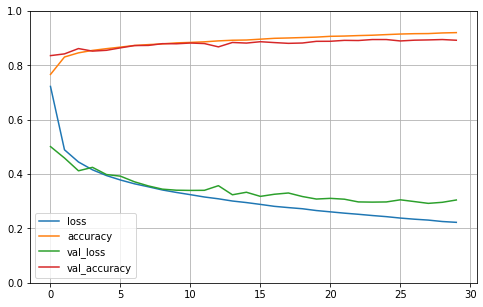

In [23]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [28]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 2s 4

In [52]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [53]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [54]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

In [55]:
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
 outputs=[output, aux_output])

In [56]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
 [X_train_A, X_train_B], [y_train, y_train], epochs=20,
 validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_30_loss: nan - dense_31_loss: nan - val_loss: nan - val_dense_30_loss: nan - val_dense_31_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_30_loss: nan - dense_31_loss: nan - val_loss: nan - val_dense_30_loss: nan - val_dense_31_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_30_loss: nan - dense_31_loss: nan - val_loss: nan - val_dense_30_loss: nan - val_dense_31_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_30_loss: nan - dense_31_loss: nan - val_loss: nan - val_dense_30_loss: nan - val_dense_31_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_30_loss: nan - dense_31_loss: nan - val_loss: nan - val_dense_30_loss: nan - val_dense_31_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - lo

In [57]:
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 2ms/step - loss: nan - dense_30_loss: nan - dense_31_loss: nan


In [58]:
# class WideAndDeepModel(keras.models.Model):
#      def __init__(self, units=30, activation="relu", **kwargs):
#         super().__init__(**kwargs) # handles standard args (e.g., name)
#         self.hidden1 = keras.layers.Dense(units, activation=activation)
#         self.hidden2 = keras.layers.Dense(units, activation=activation)
#         self.main_output = keras.layers.Dense(1)
#         self.aux_output = keras.layers.Dense(1)
        
#      def call(self, inputs):
#         input_A, input_B = inputs
#         hidden1 = self.hidden1(input_B)
#         hidden2 = self.hidden2(hidden1)
#         concat = keras.layers.concatenate([input_A, hidden2])
#         main_output = self.main_output(concat)
#         aux_output = self.aux_output(hidden2)
#         return main_output, aux_output
# model = WideAndDeepModel()

In [59]:
model.save("my_keras_model.h5")

In [60]:
model = keras.models.load_model("my_keras_model.h5")


In [68]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
 save_best_only=True)

In [69]:
checkpoint_cb

In [73]:
history = model.fit(X_train, y_train, epochs=10,
 validation_data=(X_valid, y_valid),
 callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10


AssertionError: in user code:

    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\Dhruv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:517 _run_internal_graph
        assert x_id in tensor_dict, 'Could not compute output ' + str(x)

    AssertionError: Could not compute output Tensor("dense_30/BiasAdd_1:0", shape=(None, 1), dtype=float32)
